In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os
import pandas as pd
from scipy import stats

In [2]:
notebook_path = %pwd

os.chdir(Path(notebook_path).parent)
os.getcwd()

'/home/atleeri/repositories/forecast-electricity-markets'

Load processed data

In [3]:
processed_data_dir = Path('data/processed')
filepaths = list(processed_data_dir.glob('**/*.parquet'))
filepaths

[PosixPath('data/processed/opsd-time_series-2020-10-06/time_series_15min_singleindex.parquet')]

In [4]:
filepath = filepaths[0]
df = pd.read_parquet(filepath)
df

,utc_timestamp,cet_cest_timestamp,DE_wind_generation,DE_load_transparency
0,2014-12-31 23:00:00+00:00,2015-01-01 00:00:00+01:00,NaN,NaN
1,2014-12-31 23:15:00+00:00,2015-01-01 00:15:00+01:00,NaN,NaN
2,2014-12-31 23:30:00+00:00,2015-01-01 00:30:00+01:00,NaN,NaN
3,2014-12-31 23:45:00+00:00,2015-01-01 00:45:00+01:00,NaN,NaN
4,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+01:00,NaN,NaN
...,...,...,...,...
201599,2020-09-30 22:45:00+00:00,2020-09-30 23:45:00+01:00,12820.46,46229.48
201600,2020-09-30 23:00:00+00:00,2020-10-01 00:00:00+01:00,12756.89,45792.82
201601,2020-09-30 23:15:00+00:00,2020-10-01 00:15:00+01:00,12832.02,45471.18
201602,2020-09-30 23:30:00+00:00,2020-10-01 00:30:00+01:00,12805.27,45119.89


In [5]:
df.columns

Index(['utc_timestamp', 'cet_cest_timestamp', 'DE_wind_generation',
       'DE_load_transparency'],
      dtype='object')

In [6]:
df_sample = df.sample(n=1000, random_state=2025)

In [7]:
df_sample

,utc_timestamp,cet_cest_timestamp,DE_wind_generation,DE_load_transparency
44597,2016-04-09 12:15:00+00:00,2016-04-09 13:15:00+01:00,1428.24,50687.09
192967,2020-07-03 00:45:00+00:00,2020-07-03 01:45:00+01:00,6780.99,40882.24
123244,2018-07-07 18:00:00+00:00,2018-07-07 19:00:00+01:00,14505.64,50054.10
103545,2017-12-14 13:15:00+00:00,2017-12-14 14:15:00+01:00,30561.38,73917.59
78776,2017-03-31 13:00:00+00:00,2017-03-31 14:00:00+01:00,11279.57,63074.34
...,...,...,...,...
9157,2015-04-06 08:15:00+00:00,2015-04-06 09:15:00+01:00,2762.61,45924.59
71187,2017-01-11 11:45:00+00:00,2017-01-11 12:45:00+01:00,31429.59,76518.81
78966,2017-04-02 12:30:00+00:00,2017-04-02 13:30:00+01:00,4910.29,45325.36
99062,2017-10-28 20:30:00+00:00,2017-10-28 21:30:00+01:00,37564.21,49979.09


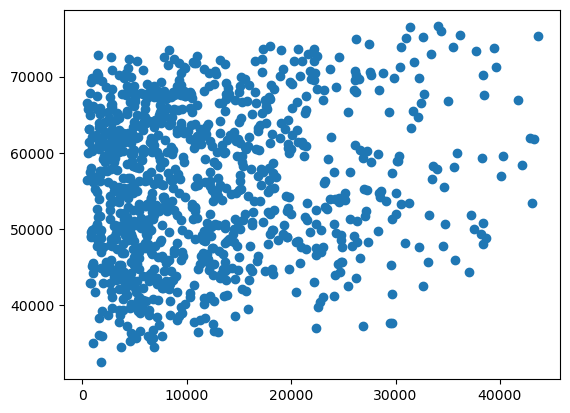

In [8]:
valid_mask = df_sample['DE_wind_generation'].notna() & df_sample['DE_load_transparency'].notna()
plt.scatter(df_sample[valid_mask]['DE_wind_generation'], df_sample[valid_mask]['DE_load_transparency'])

Linear regression

In [ ]:
rng = np.random.default_rng()
X = df_sample[valid_mask]['DE_wind_generation']
y = df_sample[valid_mask]['DE_load_transparency']

reg = stats.linregress(X, y)
reg

LinregressResult(slope=np.float64(0.1587263826709171), intercept=np.float64(53830.54464926847), rvalue=np.float64(0.1493692853409259), pvalue=np.float64(2.143054130565161e-06), stderr=np.float64(0.033293424665198766), intercept_stderr=np.float64(501.5533747337676))